In [11]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('StudentsPerformance.csv')

In [4]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Data Cleaninig

### drop not important columns  

In [6]:
data = data.drop(['test preparation course' ,'race/ethnicity'],axis = 1)

* 'test preparation course' contain too much null values

In [8]:
data.head()

,gender,parental level of education,lunch,math score,reading score,writing score
0,female,bachelor's degree,standard,72,72,74
1,female,some college,standard,69,90,88
2,female,master's degree,standard,90,95,93
3,male,associate's degree,free/reduced,47,57,44
4,male,some college,standard,76,78,75


## Encoding

### 1- Sperating object data to encoding it

In [14]:
obj_data = data.select_dtypes(include=['object'])
obj_data

,gender,parental level of education,lunch
0,female,bachelor's degree,standard
1,female,some college,standard
2,female,master's degree,standard
3,male,associate's degree,free/reduced
4,male,some college,standard
...,...,...,...
995,female,master's degree,standard
996,male,high school,free/reduced
997,female,high school,free/reduced
998,female,some college,standard


### 2- create loop to encoding columns 

In [15]:
le = preprocessing.LabelEncoder()

In [16]:
for i in range (obj_data.shape[1]):
    obj_data.iloc[:,i] = le.fit_transform(obj_data.iloc[:,i])

D:\New folder\Anaconda\lib\site-packages\pandas\core\indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
D:\New folder\Anaconda\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [17]:
obj_data

,gender,parental level of education,lunch
0,0,1,1
1,0,4,1
2,0,3,1
3,1,0,0
4,1,4,1
...,...,...,...
995,0,3,1
996,1,2,0
997,0,2,0
998,0,4,1


### 3- concat data after sperating

In [18]:
num_data = data.select_dtypes(exclude=['object'])

In [23]:
data = pd.concat([obj_data,num_data],axis=1)
data

,gender,parental level of education,lunch,math score,reading score,writing score
0,0,1,1,72,72,74
1,0,4,1,69,90,88
2,0,3,1,90,95,93
3,1,0,0,47,57,44
4,1,4,1,76,78,75
...,...,...,...,...,...,...
995,0,3,1,88,99,95
996,1,2,0,62,55,55
997,0,2,0,59,71,65
998,0,4,1,68,78,77


## Relationships

In [27]:
c = data.corr()
c

,gender,parental level of education,lunch,math score,reading score,writing score
gender,1.000000,0.001913,0.021372,0.167982,-0.244313,-0.301225
parental level of education,0.001913,1.000000,0.006320,-0.068279,-0.072444,-0.084299
lunch,0.021372,0.006320,1.000000,0.350877,0.229560,0.245769
math score,0.167982,-0.068279,0.350877,1.000000,0.817580,0.802642
reading score,-0.244313,-0.072444,0.229560,0.817580,1.000000,0.954598
writing score,-0.301225,-0.084299,0.245769,0.802642,0.954598,1.000000


<AxesSubplot:>

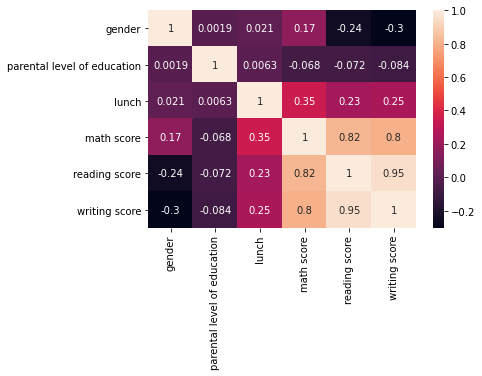

In [29]:
sns.heatmap(c,annot= True)

<AxesSubplot:>

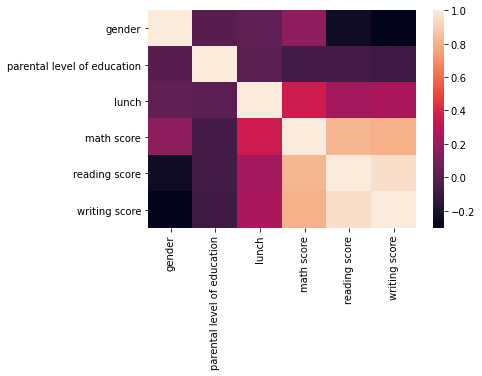

In [30]:
sns.heatmap(c)